# Decision Tree

- flow diagram
- root, split node and leaf node
- white box algorithm (easy to interpret)
- Sometimes called CARD (Classification and Regression Tree)


### What is a DT?
- Supervised Learning
- Works for both classification and regression
- Foundation on Random Forests
- Attractive because of interpretability

---

#### DT works by:
- Split based on set impurity criteria
- Stopping criteria
    - levels of depth
    
---

Source: Scikit-learn

Some **Advantages** of DT are:

- Simple to understand and to interpret. Trees can be vizualized
- Requires little data preparation
- Able to handle both numerical and categorical data
- Possible to validate a model using statistical tests
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated

**Disadavantages**:

- Overfitting: Mechanisms such as **pruning** (not currently supported), setting the **minimum number of samples required** at a leaf node or setting the **max. depth of the tree** are necessary to avoid this problem
- Decision trees can be unstable. Mitigant: **Use DT within an ensemble**
- Cannot guarantee to return globally optimal DT. Training multiple trees in an ensemble learner
- DT learners create biased tress if some classes dominate. Recomendation: **Balance the dataset prior to fitting.**
    - **Bagging**
    - **Boosting**

---


## Classification

### Training a DT with Scikit-Learn

In [1]:
from sklearn import tree

In [11]:
X = [[0,0], [1,2]] 
y = [0,1] # binary class

In [12]:
clf = tree.DecisionTreeClassifier()

In [13]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
# unseen data
clf.predict([[2., 2.]])

array([1])

In [14]:
# 0 prob in 1st class
# 1 prob in 2nd class
clf.predict_proba([[2. , 2.]])

array([[0., 1.]])

In [15]:
clf.predict([[0.4, 1.2]])

array([0])

In [16]:
clf.predict_proba([[0.4, 1.2]])

array([[1., 0.]])

In [17]:
clf.predict_proba([[0, 0.2]])

array([[1., 0.]])

`DecisionTreeClassifier` is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

---

## Decision Tree on Iris Dataset

In [18]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [19]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
X = iris.data[:, 2:]

In [22]:
y = iris.target

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [25]:
clf = clf.fit(X, y)

#### Export_graphviz

In [26]:
from sklearn.tree import export_graphviz

In [27]:
export_graphviz(clf,
                out_file="tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Run the following line on your command prompt


`$ dot -Tpng tree.dot -o tree.png`

<img src="tree.png" width=60% height=60%>

#### Graphviz

In [29]:
import graphviz

In [30]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

In [31]:
graph = graphviz.Source(dot_data)

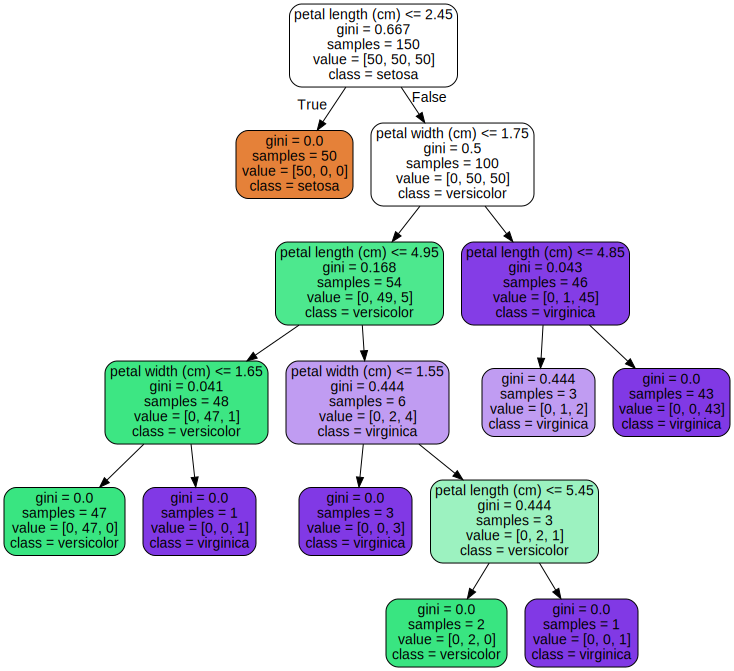

In [32]:
graph

### Visualise the Decision Boundary

In [33]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [36]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [37]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [38]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

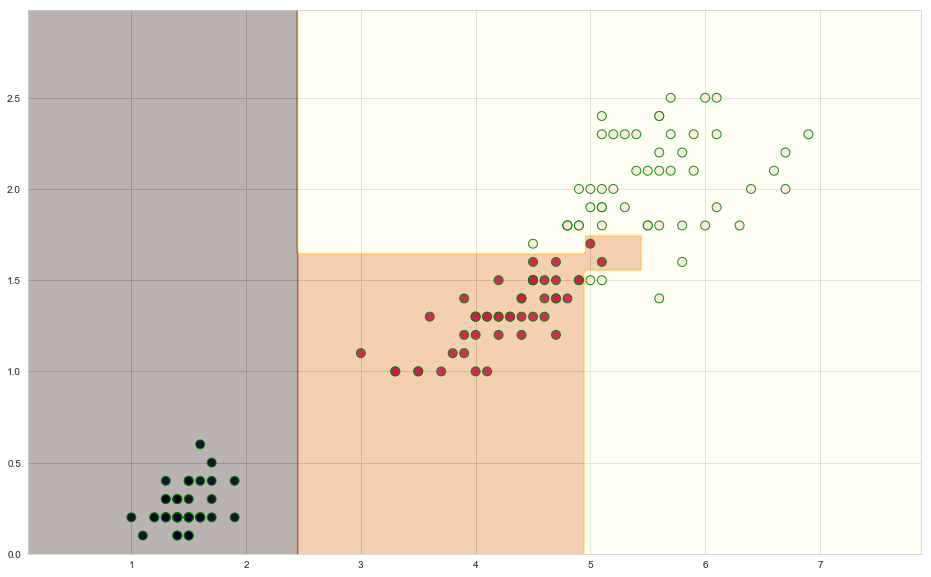

In [39]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

***

# Decision Tree Learning

* [ID3](https://en.wikipedia.org/wiki/ID3_algorithm) (Iterative Dichotomiser 3)
* [C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm) (successor of ID3)
* CART (Classification And Regression Tree)
* [CHAID](http://www.statisticssolutions.com/non-parametric-analysis-chaid/) (Chi-squared Automatic Interaction Detector). by [Gordon Kass](https://en.wikipedia.org/wiki/Chi-square_automatic_interaction_detection). 

### Tree Algorithms: ID3, C4.5, C5.0 and CART

* ID3 (Iterative Dichtomiser 3) was developed in 1986 by Ross Quinlan. The algotithm creates a multiway tree, finding for each node (in a greedy manner) the categorical feature that will yield the **largest information gain** for categorical targets. Trees are grown to their maximum size and then a **prunning step** is usually applied to improve the ability of the tree to generalize the unseen data. 

* **C4.5** is a successor of ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical values) that partitions the continnuous attribute value into a discrete set of intervals. C4.5 converts thr trained trees (output of ID3) into **sets of if-then rules**. These accuracy of each rule is then evaluated to determine the order in which they should be applied. **Prunning** is done by removing a rule's precondition if the accuracy of the rule improves withouth it.

* **C5.0** is Quinlan's last version release under a proprietary license. It uses less memory and  builds smaller rulesets than C5.5 while being more accurate

* **CHART** (Classifcication and Regression Trees) is very similar to C4.5, but differs in that it supports numerical target attributes (Regression) and does not cimpute rule sets. CART constructs **binary trees** using the feature and **treshold** that yield the largest information gain at each node. 

* **CHAID** (Chi-squared Automatic Interaction Detector) by Gordon Kass. Performs multi-level splits computing classification tress. Non-parametric. Does not require the data to be normally distributed. 

scikit-learn uses an optimised version of the CART algorithm.

#### Giny Impuriy

scikit-learn default
https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity

A measure of purity / variability of categorical data

As a side note on the difference between **Gini Impurity** and **Gini Coefficient**
https://datascience.stackexchange.com/questions/1095/gini-coefficient-vs-gini-impurity-decision-trees

* No, despite their names they are not equivalent or even that similar.
* **Gini impurity** is a measure of misclassification, which applies in a multiclass classifier context.
* **Gini coefficient** applies to binary classification and requires a classifier that can in some way rank examples according to the likelihood of being in a positive class.
* Both could be applied in some cases, but they are different measures for different things. Impurity is what is commonly used in decision trees.

Developed by [Corrado Gini](https://en.wikipedia.org/wiki/Corrado_Gini) in 1912

Key Points:
* A pure node (homogeneous contents or samples with the same class) will have a Gini coefficient of zero
* As the variation increases (heterogeneous classes or increase diversity), Gini coefficient increases and approaches 1.

$$Gini=1-\sum^r_j p^2_j$$

$p$ is the probability (often based on the frequency table)

# Entropy

https://en.wikipedia.org/wiki/Entropy_information_theory

The entropy can explicitly be written as

$${\displaystyle \mathrm {H} (X)=\sum _{i=1}^{n}{\mathrm {P} (x_{i})\,\mathrm {I} (x_{i})}=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log _{b}\mathrm {P} (x_{i})},}$$

where `b` is the base of the logarithm used. Common values of `b` are 2, Euler's number `e`, and 10




# Which should I use?

[Sebastian Raschka](https://sebastianraschka.com/faq/docs/decision-tree-binary.html)

* They tend to generate similar tree
* Gini tends to be faster to compute

In [41]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

In [42]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]

sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]